In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .xlsx sin indice
data = pd.read_excel('Inmuebles2.xlsx')

In [3]:
#Convertir DataFrame a CSV
data.to_csv("Inmuebles2.csv")

In [ ]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Inmuebles2.csv') 
data

In [ ]:
#Eliminar primera fila o filas innecesarias
data1= pd.read_csv('Inmuebles2.csv', skiprows=1, low_memory=False)
data1

In [ ]:
#Eliminar columnas innecesarias
data2= data1.drop(['0','Referencia'], axis=1)
data2

In [7]:
#Identificar valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

Fecha Alta        2
Tipo              2
Operación         1
Provincia         4
Superficie        4
Precio Venta      6
Fecha Venta     578
Vendedor        578
dtype: int64

In [9]:
#Realizamos una copia del dataframe
data3=data2.copy()

In [23]:
#Valores nulos con media
data3["Superficie"]=data3["Superficie"].fillna(round(data2["Superficie"].mean(),1))
data3

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,2004-01-01 00:00:00,Parking,Alquiler,Lleida,291.0,2133903.0,2004-06-19 00:00:00,Carmen
1,2004-01-01 00:00:00,Local,Venta,Girona,185.0,1945424.0,2004-04-19 00:00:00,Pedro
2,2004-01-01 00:00:00,Oficina,Alquiler,Girona,82.0,NaN,2004-11-08 00:00:00,Joaquín
3,2004-01-02 00:00:00,Parking,Alquiler,Girona,285.0,NaN,2004-04-27 00:00:00,Jesús
4,2004-01-02 00:00:00,Suelo,Venta,Tarragona,152.0,185000.0,2004-07-10 00:00:00,María
...,...,...,...,...,...,...,...,...
3332,2007-04-29 00:00:00,Industrial,Alquiler,Lleida,221.0,1450644.0,NaN,NaN
3333,2007-04-29 00:00:00,Piso,Alquiler,Girona,55.0,454080.0,NaN,NaN
3334,2007-04-30 00:00:00,Suelo,Venta,Tarragona,78.0,740688.0,NaN,NaN
3335,2007-04-30 00:00:00,Piso,Alquiler,Barcelona,88.0,397408.0,NaN,NaN


In [24]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

Fecha Alta        2
Tipo              2
Operación         1
Provincia         4
Superficie        0
Precio Venta      6
Fecha Venta     578
Vendedor        578
dtype: int64

In [25]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
data3["Vendedor"] =data3["Vendedor"].fillna(method="ffill") 
data3

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,2004-01-01 00:00:00,Parking,Alquiler,Lleida,291.0,2133903.0,2004-06-19 00:00:00,Carmen
1,2004-01-01 00:00:00,Local,Venta,Girona,185.0,1945424.0,2004-04-19 00:00:00,Pedro
2,2004-01-01 00:00:00,Oficina,Alquiler,Girona,82.0,NaN,2004-11-08 00:00:00,Joaquín
3,2004-01-02 00:00:00,Parking,Alquiler,Girona,285.0,NaN,2004-04-27 00:00:00,Jesús
4,2004-01-02 00:00:00,Suelo,Venta,Tarragona,152.0,185000.0,2004-07-10 00:00:00,María
...,...,...,...,...,...,...,...,...
3332,2007-04-29 00:00:00,Industrial,Alquiler,Lleida,221.0,1450644.0,NaN,María
3333,2007-04-29 00:00:00,Piso,Alquiler,Girona,55.0,454080.0,NaN,María
3334,2007-04-30 00:00:00,Suelo,Venta,Tarragona,78.0,740688.0,NaN,María
3335,2007-04-30 00:00:00,Piso,Alquiler,Barcelona,88.0,397408.0,NaN,María


In [26]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

Fecha Alta        2
Tipo              2
Operación         1
Provincia         4
Superficie        0
Precio Venta      6
Fecha Venta     578
Vendedor          0
dtype: int64

In [ ]:
#Sustituir valores nulos con un string en concreto
data3['Fecha Alta'] = data3['Fecha Alta'].fillna("2004-01-01 00:00:00")
data3

In [29]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

Fecha Alta        0
Tipo              2
Operación         1
Provincia         4
Superficie        0
Precio Venta      6
Fecha Venta     578
Vendedor          0
dtype: int64

In [ ]:
data3['Fecha Venta'] = data3['Fecha Venta'].fillna("2007-04-30 00:00:00")
data3

In [ ]:
valores_nulos=data3.isnull().sum()
valores_nulos

In [36]:
#Sustituir valores nulos por un valor numérico en  concreto 

data3["Precio Venta"]= data3["Precio Venta"].fillna(1000000.0) 
data3

,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,2004-01-01 00:00:00,Parking,Alquiler,Lleida,291.0,2133903.0,2004-06-19 00:00:00,Carmen
1,2004-01-01 00:00:00,Local,Venta,Girona,185.0,1945424.0,2004-04-19 00:00:00,Pedro
2,2004-01-01 00:00:00,Oficina,Alquiler,Girona,82.0,2000000.0,2004-11-08 00:00:00,Joaquín
3,2004-01-02 00:00:00,Parking,Alquiler,Girona,285.0,2000000.0,2004-04-27 00:00:00,Jesús
4,2004-01-02 00:00:00,Suelo,Venta,Tarragona,152.0,185000.0,2004-07-10 00:00:00,María
...,...,...,...,...,...,...,...,...
3332,2007-04-29 00:00:00,Industrial,Alquiler,Lleida,221.0,1450644.0,10,María
3333,2007-04-29 00:00:00,Piso,Alquiler,Girona,55.0,454080.0,10,María
3334,2007-04-30 00:00:00,Suelo,Venta,Tarragona,78.0,740688.0,10,María
3335,2007-04-30 00:00:00,Piso,Alquiler,Barcelona,88.0,397408.0,10,María


In [37]:
valores_nulos=data3.isnull().sum()
valores_nulos

Fecha Alta      0
Tipo            2
Operación       1
Provincia       4
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

In [ ]:
#Sustituir valores nulos por valores no nulos hacia atrás backward fill" ("bfill")
data3["Provincia"] =data3["Provincia"].fillna(method="bfill") 
data3

In [39]:
valores_nulos=data3.isnull().sum()
valores_nulos

Fecha Alta      0
Tipo            2
Operación       1
Provincia       0
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

In [ ]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
data3["Tipo"] =data3["Tipo"].fillna(method="ffill") 
data3

In [41]:
valores_nulos=data3.isnull().sum()
valores_nulos

Fecha Alta      0
Tipo            0
Operación       1
Provincia       0
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

In [ ]:
#Sustituir valores nulos por un string en  concreto 
data3['Operación'] = data3['Operación'].fillna("Don't know")
data3

In [ ]:
valores_nulos=data3.isnull().sum()
valores_nulos

In [44]:
#Obtenemos la cuenta de los elementos nulos del dataframe completo
Cuenta_Total_Nulos= data3.isnull().sum().sum()
Cuenta_Total_Nulos

0

In [46]:
#Convertir DataFrame a CSV
data3.to_csv("Inmuebles_sin_valores_NA.csv")

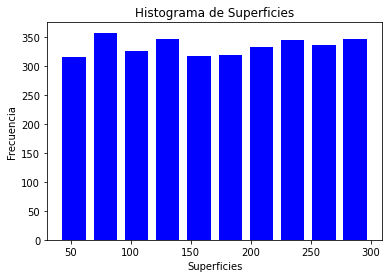

In [47]:
#Realizamos histograma de variables cuantitativas
plt.hist(x=data3["Superficie"], color='blue', rwidth=0.75)
plt.title('Histograma de Superficies')
plt.xlabel('Superficies')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

In [48]:
hola

NameError: name 'hola' is not defined